In [2]:
# Deformations
import numpy as np
import matlib
import matplotlib.pyplot as plt

def read_values_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    values = []
    for line in lines:
        stripped_line = line.strip()
        if stripped_line:
            values.append(float(stripped_line))
    return np.array(values)

def fE_tsaiwu(s,m):
    """ Calculates the Tsai-Wu exposure factor """
    s1,s2,s3,s23,s13,s12=s[0],s[1],s[2],s[3],s[4],s[5]
    XT,YT,ZT,XC,YC,ZC,S12,S13,S23 = m['XT'], m['YT'], m['ZT'], m['XC'], m['YC'], m['ZC'], m['S12'], m['S13'], m['S23']
    f12, f13, f23 = m['f12'], m['f13'], m['f23']
    F1,  F2,  F3  = (1/XT)-(1/XC) , (1/YT)-(1/YC) , (1/ZT)-(1/ZC)
    F11, F22, F33 =     1/(XT*XC) ,     1/(YT*YC) ,     1/(ZT*ZC)
    F44, F55, F66 =    1/(S23**2) ,    1/(S13**2) ,     1/(S12**2)
    F12 = f12*(F11*F22)**0.5
    F13 = f13*(F11*F33)**0.5
    F23 = f23*(F22*F33)**0.5
    a=F11*(s1**2) + F22*(s2**2) + F33*(s3**2)+ 2*(F12*s1*s2 + F13*s1*s3 + F23*s2*s3)+\
    F44*(s23**2) + F55*(s13**2) + F66*(s12**2)
    if a==0:
        return 0
    b=F1*s1 + F2*s2 +F3*s3
    c=-1
    R=(-b+(b**2-4*a*c)**0.5)/(2*a)
    fE=1/R
    return fE

# Material

In [3]:
mcfrp= matlib.get("Carbon/Epoxy(a)")

mcore={'name':'H100','rho':100E-12,
       'E1':100, 'E2':100, 'E3':100,
       'v12':0.3, 'v13':0.3, 'v23':0.3, 
       'G12': 38.5, 'G13': 38.5, 'G23': 38.5 }

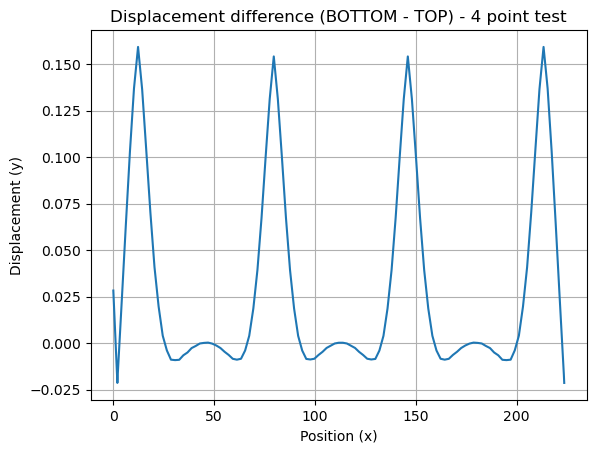

In [4]:
FOLDER_NAME = "Abaqus outputs 4 point test"

pos = read_values_from_file(FOLDER_NAME + "\\pos_top.txt")
disp_top = read_values_from_file(FOLDER_NAME + "\\disp_top.txt")
disp_bottom = read_values_from_file(FOLDER_NAME + "\\disp_bottom.txt")


# plott difference
disp_diff =  disp_bottom - disp_top

plt.plot(pos, disp_diff, linestyle='-')

plt.xlabel('Position (x)')
plt.ylabel('Displacement (y)')
plt.title('Displacement difference (BOTTOM - TOP) - 4 point test')

# Legger til rutenett og legg til en legende
plt.grid(True)

# Vist plottet
plt.show()

# Tsai-Wu Top sheet 4-point Test

Tsai-Wu criterion
  Position      Exposure factor
----------------------------------------
      0.00              0.04408
      2.01              0.03468
      2.21              0.03740
      4.22              0.03989
      6.23              0.06018
      8.23              0.08600
     10.25              0.10642
     12.26              0.11846
     14.30              0.12139
     16.33              0.11548
     18.37              0.10351
     20.41              0.08747
     22.46              0.07253
     24.50              0.06208
     26.54              0.06250
     28.59              0.06874
     30.63              0.08032
     32.68              0.09040
     34.72              0.10324
     36.77              0.11275
     38.81              0.12562
     40.86              0.13418
     42.90              0.14752
     44.94              0.15522
     46.99              0.16969
     49.03              0.17642
     51.07              0.19276
     53.11              0.19810
     55.15   

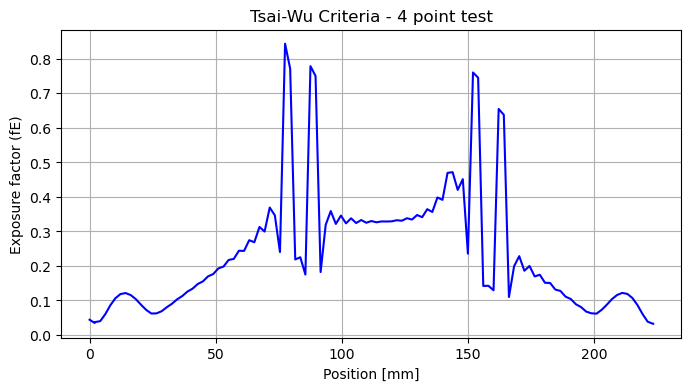

In [5]:
FOLDER_NAME = "Abaqus outputs 4 point test"

S11_top = read_values_from_file(FOLDER_NAME +"\\S11_top.txt")
S22_top = read_values_from_file(FOLDER_NAME +"\\S22_top.txt")
S33_top = read_values_from_file(FOLDER_NAME +"\\S33_top.txt")
pos_top = read_values_from_file(FOLDER_NAME +"\\pos_top.txt")


print("Tsai-Wu criterion")
print(f"{'Position':>10} {'Exposure factor':>20}")
print("-" * 40)

fig,ax = plt.subplots(figsize=(8,4))

fE_list = []

for i in range(len(pos_top)):

    s1i, s2i, s3i = S11_top[i], S22_top[i], S33_top[i]

    fe = fE_tsaiwu((s1i, s2i, s3i, 0, 0, 0), mcfrp)
    fE_list.append(fe)

    print(f"{pos_top[i]:10.2f} {fe:20.5f}")

plt.plot(pos_top, fE_list, label="Fiber Fracture", color="b")
plt.xlabel("Position [mm]")
plt.ylabel("Exposure factor (fE)")
plt.grid()
plt.title("Tsai-Wu Criteria - 4 point test")
plt.show()

# Reaction force 4-point test

In [12]:
FOLDER_NAME = "Abaqus outputs 4 point test"
rf = read_values_from_file(FOLDER_NAME +"\\rf.txt")
tot_rf = np.sum(rf)
print(tot_rf)

1480.1597


# 3 Point test

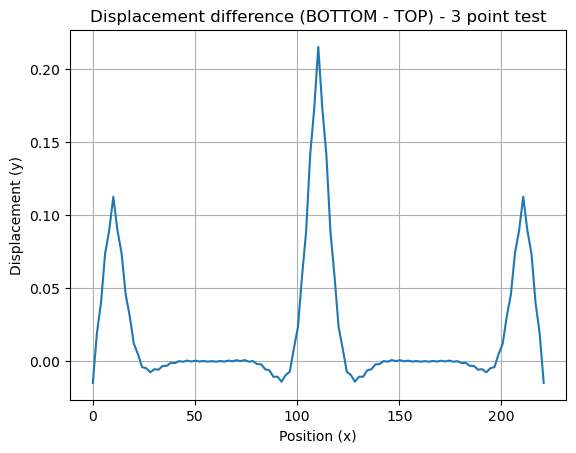

In [6]:
FOLDER_NAME = "Abaqus outputs 3 point test"

pos = read_values_from_file(FOLDER_NAME + "\\pos_top.txt")
disp_top = read_values_from_file(FOLDER_NAME + "\\disp_top.txt")
disp_bottom = read_values_from_file(FOLDER_NAME + "\\disp_bottom.txt")


# plott difference
disp_diff =  disp_bottom - disp_top

plt.plot(pos, disp_diff, linestyle='-')

plt.xlabel('Position (x)')
plt.ylabel('Displacement (y)')
plt.title('Displacement difference (BOTTOM - TOP) - 3 point test')

# Legger til rutenett og legg til en legende
plt.grid(True)

# Vist plottet
plt.show()

# Tsai-Wu 3 point test

Tsai-Wu criterion
  Position      Exposure factor
----------------------------------------
      0.00              0.02343
      2.00              0.03030
      4.01              0.05179
      6.01              0.07580
      8.02              0.09450
     10.03              0.10569
     12.04              0.10839
     14.05              0.10359
     16.06              0.09272
     18.07              0.07837
     20.08              0.06284
     22.10              0.04991
     24.11              0.04305
     26.12              0.04530
     28.13              0.05160
     30.14              0.06036
     32.16              0.06816
     34.17              0.07694
     36.18              0.08400
     38.19              0.09235
     40.20              0.09872
     42.21              0.10693
     44.23              0.11281
     46.24              0.12115
     48.25              0.12660
     50.26              0.13525
     52.27              0.14026
     54.28              0.14935
     56.29   

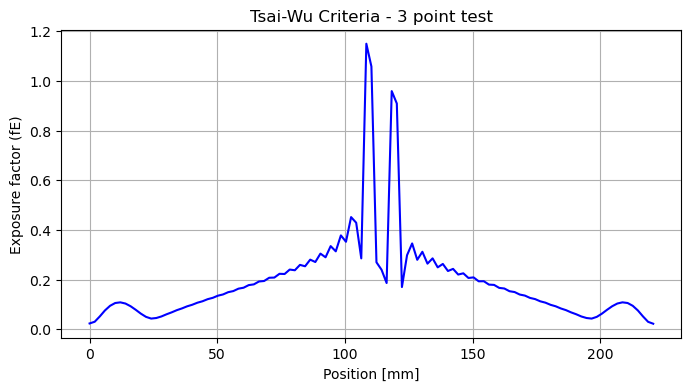

In [7]:
FOLDER_NAME = "Abaqus outputs 3 point test"

S11_top = read_values_from_file(FOLDER_NAME +"\\S11_top.txt")
S22_top = read_values_from_file(FOLDER_NAME +"\\S22_top.txt")
S33_top = read_values_from_file(FOLDER_NAME +"\\S33_top.txt")
pos_top = read_values_from_file(FOLDER_NAME +"\\pos_top.txt")


print("Tsai-Wu criterion")
print(f"{'Position':>10} {'Exposure factor':>20}")
print("-" * 40)

fig,ax = plt.subplots(figsize=(8,4))

fE_list = []

for i in range(len(pos_top)):

    s1i, s2i, s3i = S11_top[i], S22_top[i], S33_top[i]

    fe = fE_tsaiwu((s1i, s2i, s3i, 0, 0, 0), mcfrp)
    fE_list.append(fe)

    print(f"{pos_top[i]:10.2f} {fe:20.5f}")

plt.plot(pos_top, fE_list, label="Fiber Fracture", color="b")
plt.xlabel("Position [mm]")
plt.ylabel("Exposure factor (fE)")
plt.grid()
plt.title("Tsai-Wu Criteria - 3 point test")
plt.show()

# Reaction Force 3-point solid

In [ ]:
FOLDER_NAME = "Abaqus outputs 3 point test"
rf = read_values_from_file(FOLDER_NAME +"\\rf.txt")
tot_rf = np.sum(rf)
print(tot_rf)

1010.6305


# Reaction Force 3-point shell

In [11]:
FOLDER_NAME = "Abaqus outputs 3 point test shell"
rf = read_values_from_file(FOLDER_NAME +"\\rf.txt")
tot_rf = np.sum(rf)
print(tot_rf)

947.5372
